In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
step_size = 0.005
number_of_data_points = 2001
x_positions = np.linspace(-step_size*(number_of_data_points-1)/2,step_size*(number_of_data_points-1)/2,number_of_data_points)

h_bar = 1
mass = 1
gamma=1
k=0.01
c=0.2
omega = ((gamma + c)/mass) ** 0.5

In [3]:
kinetic = 2 * np.eye(number_of_data_points) - 1 * np.eye(number_of_data_points, k=1) - 1 * np.eye(number_of_data_points, k=-1)
kinetic_multiplier = h_bar**2/(2*mass*step_size**2)
kinetic = kinetic * kinetic_multiplier
print(kinetic)

potential = np.zeros((number_of_data_points, number_of_data_points))
for i in range(len(potential)):
    potential[i][i] = gamma*(0.5*(1+c)*x_positions[i]**2-0.25*k*c*x_positions[i]**4)

hamiltonian = kinetic + potential

[[ 40000. -20000.      0. ...      0.      0.      0.]
 [-20000.  40000. -20000. ...      0.      0.      0.]
 [     0. -20000.  40000. ...      0.      0.      0.]
 ...
 [     0.      0.      0. ...  40000. -20000.      0.]
 [     0.      0.      0. ... -20000.  40000. -20000.]
 [     0.      0.      0. ...      0. -20000.  40000.]]


In [4]:
eigenvalues, eigenvectors = np.linalg.eig(hamiltonian)
Z = zip(eigenvalues, np.transpose(eigenvectors))
Z = sorted(Z)
eigenvalues, eigenvectors = zip(*Z)
print(eigenvectors[0])

ground_state= eigenvectors[0]*eigenvectors[0]
ground_state_probability=ground_state/sum(ground_state*step_size); 

[3.44310578e-09 6.88864596e-09 1.03390466e-08 ... 1.03390503e-08
 6.88864872e-09 3.44310729e-09]


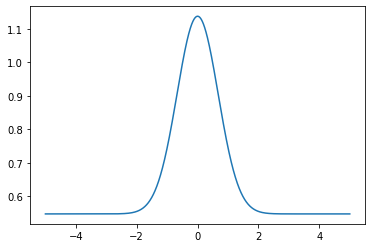

In [5]:
plt.plot(x_positions, ground_state_probability + eigenvalues[0])
plt.show()
